# ch 9. function
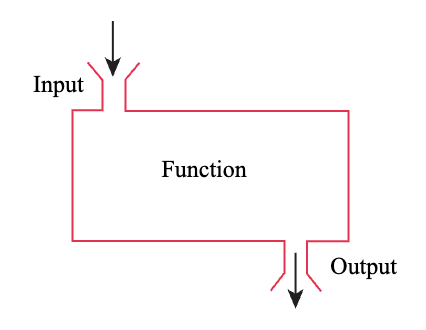

프로그래밍에서 함수란 input을 전달받아서 어떤 로직을 처리하고, 그 결과를 리턴해주는 것입니다.  
함수를 사용하면 코드를 한번 작성하고, 전달하는 파라미터만 변경해서 사용할 수 있습니다.  
덕분에 코드의 재사용성이 좋아지고, 역할별로 코드를 묶어서 작성하는 것이 가능해집니다.  

## 함수의 기본 사용법
함수는 기본적으로 def 키워드를 사용하여 작성하며, 함수의 입력에 해당하는 파라미터들을 전달받을 수 있습니다.  
파라미터를 전달받아서 내부 로직을 수행하고, 결과로 리턴하고 싶은 변수를 return 키워드에 전달하면 됩니다.  
(파라미터는 param, 아규먼트, 매개변수 등으로 불리기도 한다. 모두 쓰이는 용어들입니다.)

```python
def 함수명(파라미터 1, 파라미터 2, ...):
    실행할 코드
    return 리턴할 변수
```

이전 시간에 예시로 작성했던 잔돈 개수 구하기 문제를 함수로 표현해보겠습니다.

In [2]:
def calculate_change(pay, price):
    answer = 0
    change_units = [50000, 10000, 5000, 1000, 500, 100]
    change = pay - price
    for change_unit in change_units:
        if change >= change_unit:
            cur_change = change // change_unit
            answer += cur_change
            change -= cur_change * change_unit
        if not change:
            break
    return answer

### 함수 호출
"함수명(파라미터)" 이런 식으로 함수에 입력을 넣어서 실행할 수 있습니다. 이를 함수를 호출한다라고 표현합니다.  
파라미터를 전달할 때 순서를 헷갈리면 안됩니다.  

In [5]:
calculate_change(50000, 34500)

3

In [6]:
calculate_change(50000, 37800)

5

### 키워드를 지정해서 호출

파라미터를 전달할 때 헷갈리다면, 파라미터 이름을 지정해서 함수를 호출할 수도 있습니다.  
파라미터에 이름을 지정해서 전달할 경우, 순서가 뒤바뀌어도 상관없습니다.  

In [7]:
calculate_change(pay=50000, price=18300)

7

### 함수를 사용하는 이유
잔돈 계산 로직을 함수로 표현하니 어떠한 점들이 편리해졌나요?  
먼저 입력 값만 주어지면 잔돈을 계산할 수 있게 되었습니다.  
이제 잔돈 계산 로직을 언제든지 재사용할 수 있게 되었습니다.    
이를 프로그래밍에서는 "재사용성이 높아졌다" 라고 표현한다.  

또한 잔돈을 계산하는 세부 로직이 calculate_change라는 하나의 함수로 묶였습니다.    
덕분에 전반적인 코드가 더 짜임새 있고, 파악하기가 쉬워졌습니다.  
이를 프로그래밍에서는 "추상화 되었다" 라고 표현한다.  

정리하면 잔돈 계산하는 로직을 함수로 따로 빼니, 언제든 재사용이 가능해지고 로직 파악이 쉬워졌습니다.    
앞으로 이 함수라는 것은 개발을 하면서 정말 수도 없이 사용하고 작성해야합니다.  

### 파라미터가 없는 함수
- 파라미터 없이도 함수를 정의할 수 있습니다.

In [9]:
def say_hello():
    return "hello"

In [10]:
print(say_hello())

hello


## 함수의 리턴값
- 함수의 리턴 값은 언제나 하나입니다. 여러개거나 없는 경우도 있지 않냐고 생각할 수도 있지만, 언제나 하나입니다. 왜 하나인지를 예시를 통해 알아봅시다.


In [11]:
# 리턴 값이 하나인 함수
def add(num_a, num_b):
    return num_a + num_b

In [12]:
add(3, 5)

8

- return 키워드 뒤에 여러 변수를 전달할 수 있습니다.
- 실제로 값을 받아보면 리턴 값들이 튜플로 묶여있습니다. 
- 이렇게 함수 하나가 여러 값을 하나의 튜플로 묶어서 리턴할 경우, 비구조 할당을 사용하면 편합니다.

In [13]:
def add_and_sub(num_a, num_b):
    return num_a+num_b, num_a - num_b

In [15]:
result = add_and_sub(3, 5)
print(result, type(result))

(8, -2) <class 'tuple'>


In [16]:
add_result, sub_result = add_and_sub(3, 5)
print(add_result, type(add_result), sub_result, type(sub_result))

8 <class 'int'> -2 <class 'int'>


- 리턴 값이 없는 함수도 실제로 리턴 값을 받아보면 None 값이 리턴됩니다.
- 말 그대로 아무것도 없는 값을 의미한다. 파이썬 프로그래밍을 할 때 앞으로 자주 보게 될 값이다.

In [58]:
result = say_hello()
print(result, type(result))

hello
None <class 'NoneType'>


## 파라미터에 초기값 미리 설정하기
- 함수의 파라미터에 default 값을 설정할 수 있습니다.
- default 값이 설정되어 있을 경우, 함수 호출 시에 그 파라미터를 생략해도 됩니다.
- default 값을 설정하는 파라미터는 그렇지 않은 파라미터 뒤에 옵니다.

In [17]:
def calculate_change(pay, price=30000):
    answer = 0
    change_units = [50000, 10000, 5000, 1000, 500, 100]
    change = pay - price
    for change_unit in change_units:
        if change >= change_unit:
            cur_change = change // change_unit
            answer += cur_change
            change -= cur_change * change_unit
        if not change:
            break
    return answer

In [18]:
# price 생략하고 호출
calculate_change(38000)

4

In [19]:
# 파라미터 모두 넣어서 호출
calculate_change(38000, 31000)

3

## Quiz 1. 원 출력 함수
반지름을 파라미터로 전달받아서 원을 출력하는 함수를 작성하세요.

In [27]:
def print_circle(radius):
    for y in range(-radius, radius + 1):
        for x in range(-radius, radius + 1):
            if x**2 + y**2 <= radius**2:
                print("*", end=' ')
            else:
                print(" ", end=' ')
        print()

In [28]:
print_circle(10)

                    *                     
            * * * * * * * * *             
        * * * * * * * * * * * * *         
      * * * * * * * * * * * * * * *       
    * * * * * * * * * * * * * * * * *     
    * * * * * * * * * * * * * * * * *     
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
* * * * * * * * * * * * * * * * * * * * * 
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
    * * * * * * * * * * * * * * * * *     
    * * * * * * * * * * * * * * * * *     
      * * * * * * * * * * * * * * *       
        * * * * * * * * * * * * *         
            * * * * * * * * *             
                    *                     


### Quiz 2. 다른 문자로 채워진 원

* 대신에 원을 구성할 다른 문자를 하나 전달받아서 그 문자로 채워진 원을 출력하는 함수를 작성하세요.

In [31]:
def print_char_circle(radius, char="*"):
    for y in range(-radius, radius + 1):
        for x in range(-radius, radius + 1):
            if x**2 + y**2 <= radius**2:
                print(char, end=' ')
            else:
                print(" ", end=' ')
        print()

In [32]:
print_circle(10, "1")

                    1                     
            1 1 1 1 1 1 1 1 1             
        1 1 1 1 1 1 1 1 1 1 1 1 1         
      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1       
    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1     
    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1     
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1   
    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1     
    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1     
      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1       
        1 1 1 1 1 1 1 1 1 1 1 1 1         
            1 1 1 1 1 1 1 1 1             
                    1                     


### Quiz 3. 심화 - 반원 출력
원을 절반만 출력할지 여부를 의미하는 half라는 파라미터를 전달받는 함수를 구현하세요.

In [35]:
def print_half_circle(radius, char, half):
    if half:
        end = 1
    else:
        end = radius + 1
    for y in range(-radius, end):
        for x in range(-radius, radius + 1):
            if x**2 + y**2 <= radius**2:
                print(char, end=' ')
            else:
                print(" ", end=' ')
        print()

In [36]:
print_half_circle(10, char="*", half=True)

                    *                     
            * * * * * * * * *             
        * * * * * * * * * * * * *         
      * * * * * * * * * * * * * * *       
    * * * * * * * * * * * * * * * * *     
    * * * * * * * * * * * * * * * * *     
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
  * * * * * * * * * * * * * * * * * * *   
* * * * * * * * * * * * * * * * * * * * * 


## 정리

이번 챕터에서는 앞으로 정말 정말 많이 쓰게 될 함수에 대해서 알아보았습니다.  
함수를 적절하게 작성하는 것만으로도 많은 프로그램들을 작성할 수 있습니다.  
함수의 핵심적인 개념들을 잘 숙지하고 넘어가시기 바랍니다.